# 1. 선형회귀

In [16]:
from tkinter.constants import RIDGE

import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

import koreanize_matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from scipy.stats import alpha

# 나눔고딕 경로 찾기 (macOS 기준)
font_path = fm.findfont("NanumGothic")
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트와 마이너스 기호 깨짐 방지 설정
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False



path = "./csv_dir/training_test_data.csv"
df = pd.read_csv(path)
df



,Age,Gender,Experience,Income
0,50,1,15,180
1,29,1,5,163
2,36,1,6,134
3,34,2,4,132
4,46,1,9,188
...,...,...,...,...
95,46,2,19,198
96,31,1,6,130
97,57,2,29,168
98,22,1,1,129


기울기 w: 0.3570
절편 b: 0.1068
평균 제곱 오차 (MSE): 0.1022


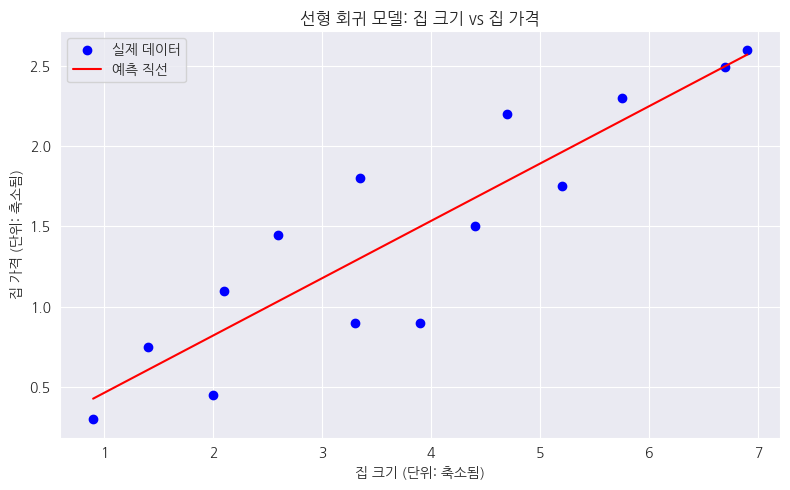

In [17]:
# 실습1 문제 코드 - 선형 회귀 + MSE
import numpy as np
# import matplotlib.pyplot as plt # 한글파일 문제없는 분들은 맨 앞 주석 빼고 진행

# 입력 변수 (집 크기)와 출력 변수 (집 가격)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# 1. 선형 회귀 수식 구하기
w, b = np.polyfit(house_size, house_price, 1)

# 2. 예측값 계산
predicted_price = w * house_size + b

# 3. MSE 계산
mse = np.mean((house_price - predicted_price) ** 2)

# 결과 출력
print(f"기울기 w: {w:.4f}")
print(f"절편 b: {b:.4f}")
print(f"평균 제곱 오차 (MSE): {mse:.4f}")

# 시각화
plt.figure(figsize=(8, 5))
plt.scatter(house_size, house_price, color='blue', label='실제 데이터')
plt.plot(house_size, predicted_price, color='red', label='예측 직선')
plt.title("선형 회귀 모델: 집 크기 vs 집 가격")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

학습 완료! 기울기 w = 0.3572, 절편 b = 0.1061
최종 MSE: 0.1022


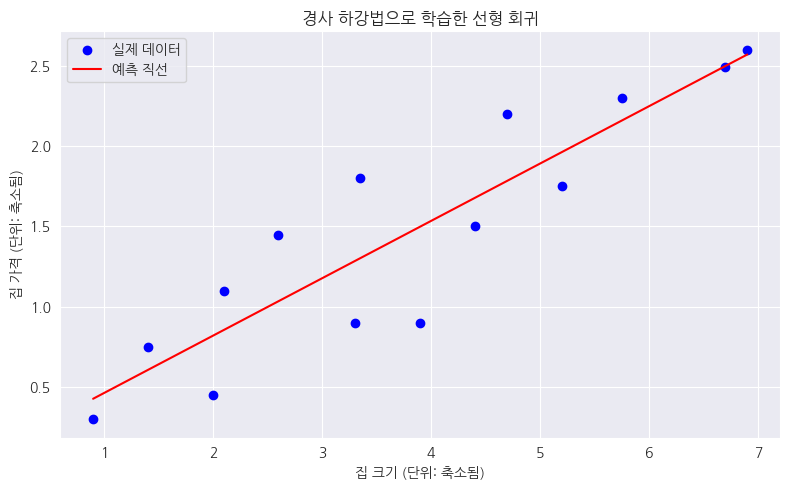

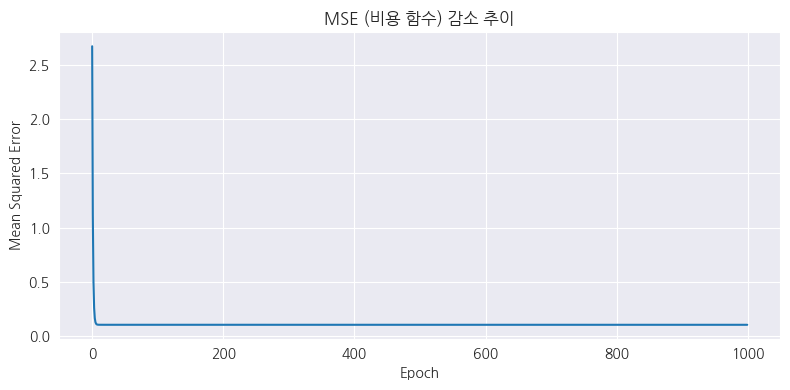

In [18]:
# 실습2 문제 코드 - 기울기 하강법으로 선형 회귀 실습
# 초기 파라미터
w = 0.0
b = 0.0
lr = 0.01       # 학습률 (learning rate)
epochs = 1000   # 반복 횟수=> ML/DL에서 최적화할 때 변경하는 수치
n = len(house_size)

# 비용 추적용 리스트
cost_list = []

# 경사 하강법
for epoch in range(epochs):
    y_pred = w * house_size + b
    error = y_pred - house_price

    dw = (2/n) * np.dot(error, house_size)
    db = (2/n) * error.sum()

    w -= lr * dw
    b -= lr * db

    mse = np.mean(error ** 2)
    cost_list.append(mse)

# 최종 결과 출력
print(f"학습 완료! 기울기 w = {w:.4f}, 절편 b = {b:.4f}")
print(f"최종 MSE: {mse:.4f}")

# 회귀선 예측
predicted_price = w * house_size + b

# 실제 데이터와 예측 직선 시각화
plt.figure(figsize=(8, 5))
plt.scatter(house_size, house_price, color='blue', label='실제 데이터')
plt.plot(house_size, predicted_price, color='red', label='예측 직선')
plt.title("경사 하강법으로 학습한 선형 회귀")
plt.xlabel("집 크기 (단위: 축소됨)")
plt.ylabel("집 가격 (단위: 축소됨)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 비용 함수 수렴 시각화
plt.figure(figsize=(8, 4))
plt.plot(cost_list)
plt.title("MSE (비용 함수) 감소 추이")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.tight_layout()
plt.show()

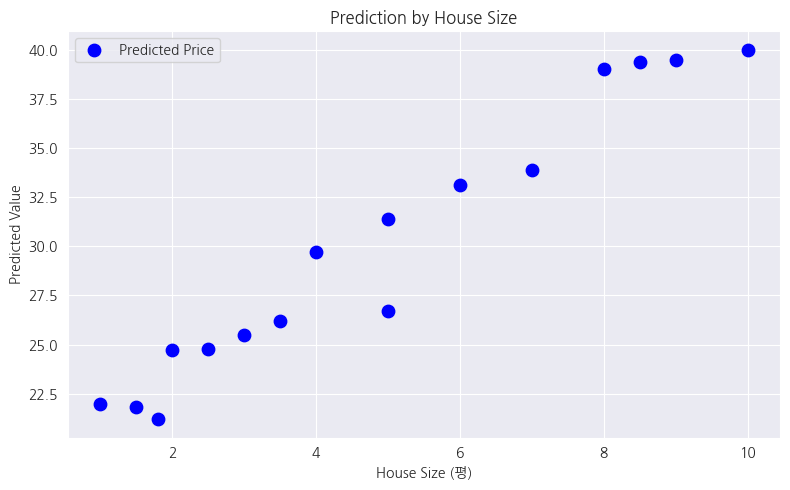

In [19]:
#실습3 문제 코드 - 다중 선형 회귀

# 1. 입력 변수
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])  # 집 크기
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])  # 지하철역으로부터의 거리 (km)
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])  # 방 수

# 2. 설계 행렬 X 정의
X = np.array([
    np.ones(16),                   # np.ones(16): 모든 행마다 1을 추가하기 위해 (총 16개의 1 필요)
    house_size,
    distance_from_station,
    number_of_rooms
]).T

# 3. 파라미터 (임의로 설정)
theta = np.array([1, 2, 3, 4])  # θ₀=1, θ₁=2, θ₂=3, θ₃=4

# 4. 다중 선형 회귀 가설 함수
def prediction(X, theta):
    y = X @ theta
    return y

# 5. 예측값 계산
y_pred = prediction(X, theta)

# 6. 시각화 (집 크기 vs 예측값)
plt.figure(figsize=(8, 5))
plt.scatter(house_size, y_pred, color='blue', label='Predicted Price', s=80)
plt.xlabel("House Size (평)")
plt.ylabel("Predicted Value")
plt.title("Prediction by House Size")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

계수 (theta): [72.7908575  11.00899684  4.6295037 ]
절편 (intercept): 193.82183710792657
R^2 점수: 0.9882032500774084


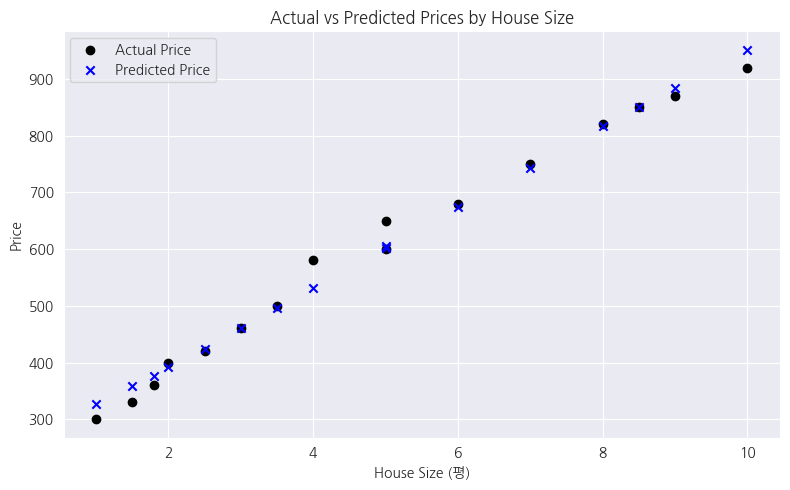

In [20]:
# 추가 -  다중 선형 회귀 실습 코드 예시 (Python - scikit-learn)

from sklearn.linear_model import LinearRegression

# 1. 데이터 정의
house_size = np.array([1.0, 1.5, 1.8, 5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 8.5, 9.0, 10.0])
distance_from_station = np.array([5, 4.6, 4.2, 3.9, 3.9, 3.6, 3.5, 3.4, 2.9, 2.8, 2.7, 2.3, 2.0, 1.8, 1.5, 1.0])
number_of_rooms = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

# 종속 변수(y): 여기선 임의로 생성 (실제 데이터가 없으니 가상의 가격 데이터 예시)
# 실제 분석에서는 진짜 집값 데이터가 필요합니다!
price = np.array([300, 330, 360, 650, 400, 420, 460, 500, 580, 600, 680, 750, 820, 850, 870, 920])

# 2. 특성 행렬 (X) 구성
X = np.column_stack([house_size, distance_from_station, number_of_rooms])

# 3. 모델 학습
model = LinearRegression()
model.fit(X, price)

# 4. 예측
y_pred = model.predict(X)

# 결과 출력
print("계수 (theta):", model.coef_)
print("절편 (intercept):", model.intercept_)
print("R^2 점수:", model.score(X, price))

# 시각화 (house_size vs 실제/예측 가격)
plt.figure(figsize=(8, 5))
plt.scatter(house_size, price, color='black', label='Actual Price')
plt.scatter(house_size, y_pred, color='blue', label='Predicted Price', marker='x')
plt.xlabel("House Size (평)")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices by House Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Salary 데이터로 선형회귀 기본 코딩 (사이킷런 사용 X)

In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("./csv_dir/training_test_data.csv")

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         100 non-null    int64
 1   Gender      100 non-null    int64
 2   Experience  100 non-null    int64
 3   Income      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [24]:
data.describe()

,Age,Gender,Experience,Income
count,100.000000,100.000000,100.000000,100.000000
mean,38.880000,1.490000,11.980000,151.890000
std,12.275688,0.502418,10.458171,28.001405
min,21.000000,1.000000,0.000000,103.000000
25%,28.000000,1.000000,2.000000,127.000000
50%,37.000000,1.000000,9.000000,154.000000
75%,50.000000,2.000000,21.000000,174.000000
max,60.000000,2.000000,33.000000,200.000000


In [25]:
# 판다스의 데이터에서 넘파이로 변환 => 머신러닝 모델 학습 위해!
data_np = data.values

In [26]:
data_np

array([[ 50,   1,  15, 180],
       [ 29,   1,   5, 163],
       [ 36,   1,   6, 134],
       [ 34,   2,   4, 132],
       [ 46,   1,   9, 188],
       [ 33,   1,   3, 127],
       [ 26,   2,   8, 141],
       [ 23,   1,   5, 122],
       [ 48,   1,   7, 169],
       [ 24,   1,   5, 114],
       [ 44,   1,  10, 174],
       [ 60,   1,  25, 190],
       [ 51,   2,  17, 190],
       [ 24,   2,   1, 110],
       [ 28,   1,   2, 120],
       [ 32,   1,   3, 130],
       [ 46,   1,  12, 165],
       [ 39,   1,  10, 170],
       [ 23,   2,   3, 120],
       [ 28,   1,   1, 130],
       [ 33,   1,   3, 133],
       [ 48,   2,  15, 167],
       [ 39,   1,   6, 155],
       [ 40,   1,   9, 159],
       [ 46,   1,  13, 179],
       [ 49,   2,  22, 200],
       [ 28,   1,   3, 120],
       [ 30,   2,   1, 145],
       [ 52,   2,  27, 181],
       [ 51,   2,  21, 198],
       [ 22,   2,   1, 112],
       [ 31,   2,   4, 143],
       [ 28,   2,   2, 104],
       [ 38,   1,  11, 160],
       [ 40,  

In [27]:
# 독립변수 종속변수 구분
X = data_np[:,:-1]
y = data_np[:,-1]

In [28]:
X

array([[50,  1, 15],
       [29,  1,  5],
       [36,  1,  6],
       [34,  2,  4],
       [46,  1,  9],
       [33,  1,  3],
       [26,  2,  8],
       [23,  1,  5],
       [48,  1,  7],
       [24,  1,  5],
       [44,  1, 10],
       [60,  1, 25],
       [51,  2, 17],
       [24,  2,  1],
       [28,  1,  2],
       [32,  1,  3],
       [46,  1, 12],
       [39,  1, 10],
       [23,  2,  3],
       [28,  1,  1],
       [33,  1,  3],
       [48,  2, 15],
       [39,  1,  6],
       [40,  1,  9],
       [46,  1, 13],
       [49,  2, 22],
       [28,  1,  3],
       [30,  2,  1],
       [52,  2, 27],
       [51,  2, 21],
       [22,  2,  1],
       [31,  2,  4],
       [28,  2,  2],
       [38,  1, 11],
       [40,  1, 13],
       [35,  1,  5],
       [21,  2,  1],
       [37,  2, 10],
       [57,  1, 30],
       [41,  2, 15],
       [49,  2, 22],
       [30,  2,  2],
       [26,  2,  1],
       [37,  2, 11],
       [28,  2,  2],
       [59,  1, 33],
       [29,  1,  2],
       [23,  

In [29]:
y

array([180, 163, 134, 132, 188, 127, 141, 122, 169, 114, 174, 190, 190,
       110, 120, 130, 165, 170, 120, 130, 133, 167, 155, 159, 179, 200,
       120, 145, 181, 198, 112, 143, 104, 160, 199, 127, 115, 146, 154,
       191, 155, 147, 110, 151, 127, 197, 117, 130, 151, 137, 181, 115,
       145, 178, 194, 126, 198, 138, 129, 131, 113, 155, 122, 159, 165,
       103, 141, 159, 194, 120, 118, 168, 156, 185, 156, 138, 174, 158,
       191, 154, 114, 200, 168, 155, 124, 160, 190, 124, 120, 189, 144,
       155, 125, 166, 197, 198, 130, 168, 129, 190])

## (1) 첫번째 모델 - 절편 없음

In [30]:
b = np.dot(np.linalg.inv(X.T @ X), X.T@y)

# np.linalg.inv(X.T @ X) => (X^T*X)^-1
# X.T@y   =>X^T*y

In [31]:
b

array([ 4.41868053,  8.71283132, -2.83170131])

**해석**
1. 나이가 1살 많을 수록 소득은 4.41 증가
2. 성별 1->2 바뀌면 소득이 8.71 증가
3. 경력이 1년 늘어나면 소득은 2.83 하락

## (2) 두번째 모델링 - 절편 추가

In [32]:
X2 = np.c_[np.ones(100), X]
X2

array([[ 1., 50.,  1., 15.],
       [ 1., 29.,  1.,  5.],
       [ 1., 36.,  1.,  6.],
       [ 1., 34.,  2.,  4.],
       [ 1., 46.,  1.,  9.],
       [ 1., 33.,  1.,  3.],
       [ 1., 26.,  2.,  8.],
       [ 1., 23.,  1.,  5.],
       [ 1., 48.,  1.,  7.],
       [ 1., 24.,  1.,  5.],
       [ 1., 44.,  1., 10.],
       [ 1., 60.,  1., 25.],
       [ 1., 51.,  2., 17.],
       [ 1., 24.,  2.,  1.],
       [ 1., 28.,  1.,  2.],
       [ 1., 32.,  1.,  3.],
       [ 1., 46.,  1., 12.],
       [ 1., 39.,  1., 10.],
       [ 1., 23.,  2.,  3.],
       [ 1., 28.,  1.,  1.],
       [ 1., 33.,  1.,  3.],
       [ 1., 48.,  2., 15.],
       [ 1., 39.,  1.,  6.],
       [ 1., 40.,  1.,  9.],
       [ 1., 46.,  1., 13.],
       [ 1., 49.,  2., 22.],
       [ 1., 28.,  1.,  3.],
       [ 1., 30.,  2.,  1.],
       [ 1., 52.,  2., 27.],
       [ 1., 51.,  2., 21.],
       [ 1., 22.,  2.,  1.],
       [ 1., 31.,  2.,  4.],
       [ 1., 28.,  2.,  2.],
       [ 1., 38.,  1., 11.],
       [ 1., 4

In [33]:
b_new = np.dot(np.linalg.inv(X2.T @ X2), X2.T@y)

In [34]:
b_new

array([68.88780097,  2.36480213, -0.89890187, -0.63455294])

# 3. Salary 데이터로 선형회귀 - 사이킷런 이용 코딩

In [35]:
data.head()

,Age,Gender,Experience,Income
0,50,1,15,180
1,29,1,5,163
2,36,1,6,134
3,34,2,4,132
4,46,1,9,188


In [36]:
data_np = data.values

In [37]:
data_np

array([[ 50,   1,  15, 180],
       [ 29,   1,   5, 163],
       [ 36,   1,   6, 134],
       [ 34,   2,   4, 132],
       [ 46,   1,   9, 188],
       [ 33,   1,   3, 127],
       [ 26,   2,   8, 141],
       [ 23,   1,   5, 122],
       [ 48,   1,   7, 169],
       [ 24,   1,   5, 114],
       [ 44,   1,  10, 174],
       [ 60,   1,  25, 190],
       [ 51,   2,  17, 190],
       [ 24,   2,   1, 110],
       [ 28,   1,   2, 120],
       [ 32,   1,   3, 130],
       [ 46,   1,  12, 165],
       [ 39,   1,  10, 170],
       [ 23,   2,   3, 120],
       [ 28,   1,   1, 130],
       [ 33,   1,   3, 133],
       [ 48,   2,  15, 167],
       [ 39,   1,   6, 155],
       [ 40,   1,   9, 159],
       [ 46,   1,  13, 179],
       [ 49,   2,  22, 200],
       [ 28,   1,   3, 120],
       [ 30,   2,   1, 145],
       [ 52,   2,  27, 181],
       [ 51,   2,  21, 198],
       [ 22,   2,   1, 112],
       [ 31,   2,   4, 143],
       [ 28,   2,   2, 104],
       [ 38,   1,  11, 160],
       [ 40,  

In [38]:
X = data_np[:,:-1]
y = data_np[:,-1]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
X_train.shape

(70, 3)

In [42]:
X_test.shape

(30, 3)

In [43]:
from sklearn.linear_model import LinearRegression

In [50]:
# 모델링
model = LinearRegression()

In [51]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# 모델 평가 - 기본 평가R^2
model.score(X_test, y_test)

0.40888955466362853

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.40888955466362853

In [54]:
from sklearn.datasets import fetch_california_housing

In [57]:
X, y = fetch_california_housing(return_X_y=True)

In [58]:
#위와 같은 코드
data = fetch_california_housing()
X, y = data.data, data.target

In [59]:
X.shape

(20640, 8)

In [77]:
# 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
model_lr = LinearRegression()

In [79]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [80]:
model_lr.score(X_test, y_test)

0.595770232606166

In [83]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 0.5)
model_ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [84]:
model_ridge.score(X_test, y_test)

0.5957941064984285

In [86]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 0.5)
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)


0.45429495443531975

In [88]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
model_elastic.fit(X_train, y_train)
model_elastic.score(X_test, y_test)

0.5755216146456115

In [93]:
from sklearn.metrics import mean_squared_error
y_pred = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_elastic = model_elastic.predict(X_test)
print("rideg",mean_squared_error(y_test, y_pred))
print("lasso",mean_squared_error(y_test, y_pred_lasso))
print("elastic net",mean_squared_error(y_test, y_pred_elastic))
#루트 씌우고 싶으면 저 값에다가 **(1/2)하면됨. sqrt쓰거나

rideg 0.5305364470355517
lasso 0.7162597593400346
elastic net 0.5571449056777037
